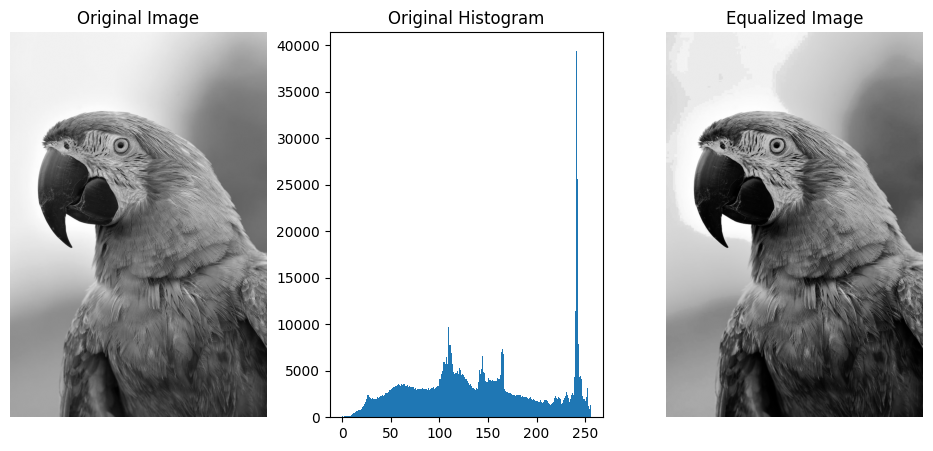

Histogram Equalization:
- Original histogram is often concentrated in a narrow range of intensities.
- After equalization, the histogram is spread more uniformly, improving contrast.
- This helps to enhance details in dark or bright regions.


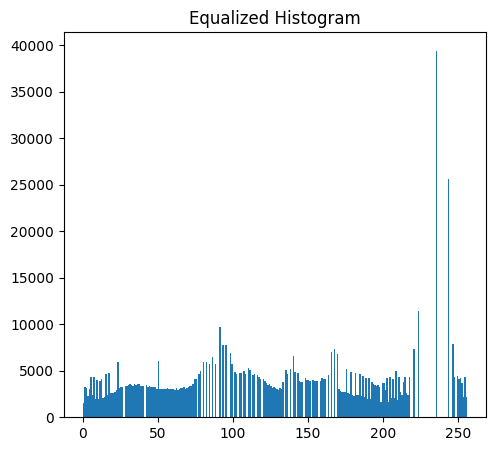

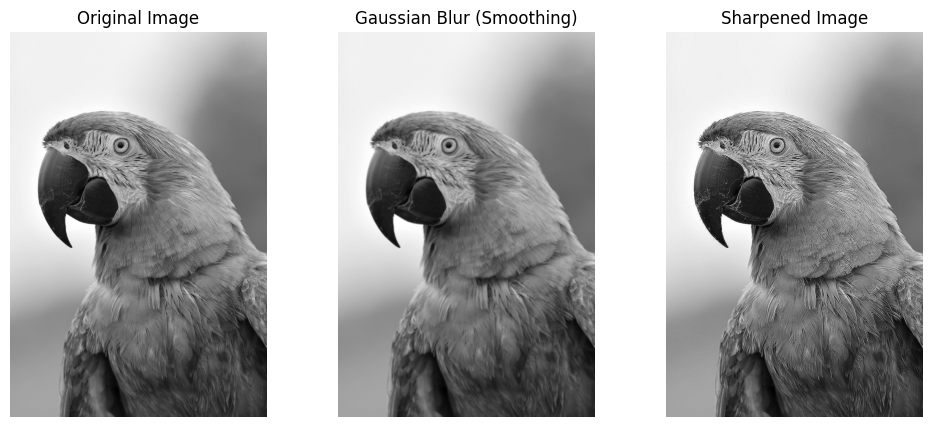

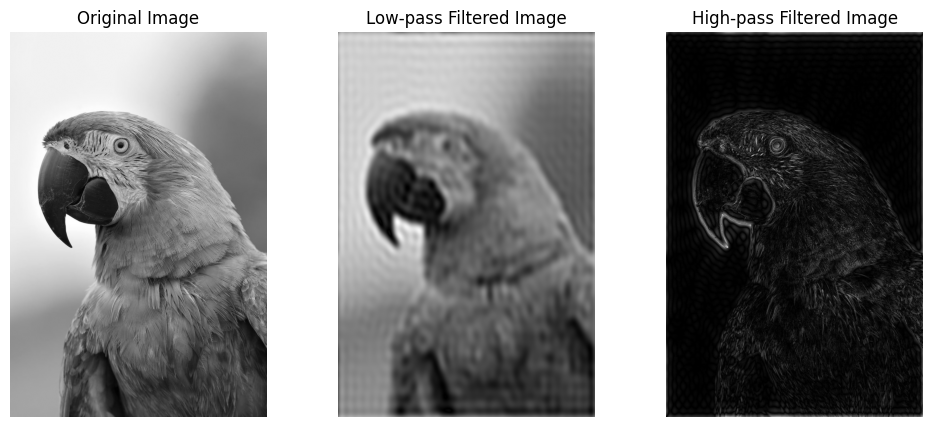

Frequency Domain Filtering:
- Low-pass filter smooths the image by removing high-frequency noise/details.
- High-pass filter enhances edges and fine details by removing low frequencies.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "https://img.freepik.com/free-photo/closeup-scarlet-macaw-from-side-view-scarlet-macaw-closeup-head_488145-3540.jpg?semt=ais_incoming&w=740&q=80"
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found. Please check the URL.")

# -------- Histogram Equalization --------
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title('Original Histogram')

equalized_img = cv2.equalizeHist(img)

plt.subplot(1,3,3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(equalized_img.ravel(), bins=256, range=[0,256])
plt.title('Equalized Histogram')

print("Histogram Equalization:")
print("- Original histogram is often concentrated in a narrow range of intensities.")
print("- After equalization, the histogram is spread more uniformly, improving contrast.")
print("- This helps to enhance details in dark or bright regions.")

# -------- Smoothing & Sharpening --------
gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur (Smoothing)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

# -------- Frequency Domain Filtering --------
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2


mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol, crow), r, 1, thickness=-1)

fshift_low = fshift * mask
f_ishift_low = np.fft.ifftshift(fshift_low)
img_back_low = np.fft.ifft2(f_ishift_low)
img_back_low = np.abs(img_back_low)


mask_high = 1 - mask
fshift_high = fshift * mask_high
f_ishift_high = np.fft.ifftshift(fshift_high)
img_back_high = np.fft.ifft2(f_ishift_high)
img_back_high = np.abs(img_back_high)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_back_low, cmap='gray')
plt.title('Low-pass Filtered Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_back_high, cmap='gray')
plt.title('High-pass Filtered Image')
plt.axis('off')
plt.show()

print("Frequency Domain Filtering:")
print("- Low-pass filter smooths the image by removing high-frequency noise/details.")
print("- High-pass filter enhances edges and fine details by removing low frequencies.")
